/Users/shiba-t/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
/Users/shiba-t/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Users/shiba-t/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


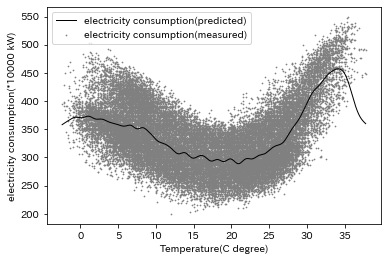

In [5]:
# coding: utf-8
import pandas as pd

# 四国電力の電力消費量データを読み込み
ed = [pd.read_csv(
    'shikoku_electricity_%d.csv' % year,
    skiprows=3,
    names=['DATE', 'TIME', 'consumption'],
    parse_dates={'date_hour': ['DATE', 'TIME']},
    index_col='date_hour')
    for year in [2012, 2013, 2014, 2015, 2016]
]

elec_data = pd.concat(ed)

# 気象データを読み込み
tmp = pd.read_csv(
    u'47891_高松.csv',
    parse_dates={'date_hour': ["日時"]},
    index_col="date_hour",
    low_memory=False,
    na_values="×"
)

del tmp["時"]  # 「時」の列は使わないので、削除

# 列の名前に日本語が入っているとよくないので、これから使う列の名前のみ英語に変更
columns = {
    "降水量(mm)": "rain",
    "気温(℃)": "temperature",
    "日照時間(h)": "sunhour",
    "湿度(％)": "humid",
}
tmp.rename(columns=columns, inplace=True)

# 気象データと電力消費量データをいったん統合して時間軸を合わせたうえで、再度分割
takamatsu = elec_data.join(tmp.ix[:, "temperature"]).dropna().as_matrix()

takamatsu_elec = takamatsu[:, 0:1]
takamatsu_wthr = takamatsu[:, 1:]

import sklearn.model_selection
import sklearn.svm

data_count = len(takamatsu_elec)

# 交差検定の準備(データ生成)
x_train, x_test, y_train, y_test =  sklearn.model_selection.train_test_split(
    takamatsu_wthr, takamatsu_elec, test_size=0.2)

# -- SVR --
model = sklearn.svm.SVR()
y_train = y_train.flatten()
y_test = y_test.flatten()

model.fit(x_train, y_train)

# -- 可視化 --
import matplotlib.pyplot as plt
import numpy as np

px = np.arange(takamatsu_wthr.min(), takamatsu_wthr.max(), 0.01)[:, np.newaxis]
py = model.predict(px)

# 以下グラフ生成
plt.xlabel('Temperature(C degree)')
plt.ylabel('electricity consumption(*10000 kW)')

plt.plot(px, py, color="black", linewidth=1,
         label='electricity consumption(predicted)')

plt.scatter(takamatsu_wthr, takamatsu_elec, s=0.5,
            color="gray", label='electricity consumption(measured)')

plt.legend(loc='upper left')
plt.savefig('7-5-2-2-graph.png')


/Users/shiba-t/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Users/shiba-t/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


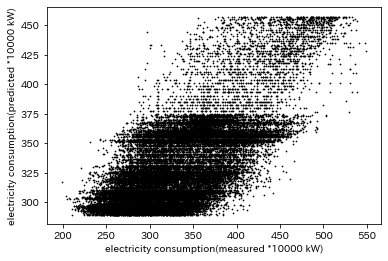

In [6]:
# coding: utf-8
import pandas as pd

# 四国電力の電力消費量データを読み込み
ed = [pd.read_csv(
    'shikoku_electricity_%d.csv' % year,
    skiprows=3,
    names=['DATE', 'TIME', 'consumption'],
    parse_dates={'date_hour': ['DATE', 'TIME']},
    index_col='date_hour')
    for year in [2012, 2013, 2014, 2015, 2016]
]

elec_data = pd.concat(ed)

# 気象データを読み込み
tmp = pd.read_csv(
    u'47891_高松.csv',
    parse_dates={'date_hour': ["日時"]},
    index_col="date_hour",
    low_memory=False,
    na_values="×"
)

del tmp["時"]  # 「時」の列は使わないので、削除

# 列の名前に日本語が入っているとよくないので、これから使う列の名前のみ英語に変更
columns = {
    "降水量(mm)": "rain",
    "気温(℃)": "temperature",
    "日照時間(h)": "sunhour",
    "湿度(％)": "humid",
}
tmp.rename(columns=columns, inplace=True)

# 気象データと電力消費量データをいったん統合して時間軸を合わせたうえで、再度分割
takamatsu = elec_data.join(tmp["temperature"]).dropna().as_matrix()

takamatsu_elec = takamatsu[:, 0:1]
takamatsu_wthr = takamatsu[:, 1:]

import sklearn.model_selection
import sklearn.svm

data_count = len(takamatsu_elec)


# 交差検定の準備(データ生成)
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    takamatsu_wthr, takamatsu_elec, test_size=0.2)

# -- SVR --
model = sklearn.svm.SVR()
x_train = x_train
y_train = y_train.flatten()
x_test = x_test
y_test = y_test.flatten()

model.fit(x_train, y_train)

# -- 可視化 --
import matplotlib.pyplot as plt
import numpy as np

plt.show()
px = np.arange(takamatsu_wthr.min(), takamatsu_wthr.max(), 0.01)[:, np.newaxis]
py = model.predict(px)

# 以下グラフ生成
plt.xlabel('electricity consumption(measured *10000 kW)')
plt.ylabel('electricity consumption(predicted *10000 kW)')

predicted = model.predict(takamatsu_wthr)

# 以下カラー環境の設定
#plt.scatter(takamatsu_elec, predicted, s=0.5)
# 以下モノクロ環境の設定
plt.scatter(takamatsu_elec, predicted, s=0.5, color="black")

plt.savefig('7-5-2-3-graph.png')


In [22]:
# coding: utf-8
import pandas as pd

# 四国電力の電力消費量データを読み込み
ed = [pd.read_csv(
    'shikoku_electricity_%d.csv' % year,
    skiprows=3,
    names=['DATE', 'TIME', 'consumption'],
    parse_dates={'date_hour': ['DATE', 'TIME']},
    index_col='date_hour')
    for year in [2012, 2013, 2014, 2015, 2016]
]

elec_data = pd.concat(ed)

# 気象データを読み込み
tmp = pd.read_csv(
    u'47891_高松.csv',
    parse_dates={'date_hour': ["日時"]},
    index_col="date_hour",
    na_values="×"
)

del tmp["時"]  # 「時」の列は使わないので、削除

# 列の名前に日本語が入っているとよくないので、これから使う列の名前のみ英語に変更
columns = {
    "降水量(mm)": "rain",
    "気温(℃)": "temperature",
    "日照時間(h)": "sunhour",
    "湿度(％)": "humid",
}
tmp.rename(columns=columns, inplace=True)

# 気象データと電力消費量データをいったん統合して時間軸を合わせたうえで、再度分割
takamatsu = elec_data.join(tmp["temperature"]).dropna().as_matrix()

takamatsu_elec = takamatsu[:, 0:1]
takamatsu_wthr = takamatsu[:, 1:]

# 学習と性能の評価
import sklearn.model_selection
import sklearn.svm

data_count = len(takamatsu_elec)

# 交差検定の準備
kf = sklearn.model_selection.KFold(n_splits=5,data_count)



# 交差検定実施(全てのパターンを実施)
for train, test in kf:
    print("train:", train)
    print("test:",test)
    x_train = takamatsu_wthr[train]
    x_test = takamatsu_wthr[test]
    y_train = takamatsu_elec[train]
    y_test = takamatsu_elec[test]

    # -- SVR --
    model = sklearn.svm.SVR()
    y_train = y_train.flatten()
    y_test = y_test.flatten()

    model.fit(x_train, y_train)
    print ("SVR: Training Score = %f, Testing(Validate) Score = %f" %
           (model.score(x_train, y_train), model.score(x_test, y_test)))


SyntaxError: positional argument follows keyword argument (<ipython-input-22-06f969bcc47d>, line 48)